Making masks from a Landsat 8 scene

In [6]:
import rasterio
from matplotlib import pyplot as plt
import numpy as np

import pyUnpackQA

This is a Landsat 8 Collection 2 Level 2 product for  Path 14, Row 41, May 3, 2013. 
It's from the example datasets here: https://www.usgs.gov/core-science-systems/nli/landsat/landsat-sample-products

In [7]:
L8_QA_PIXEL_FILE = '/home/shawn/projects/pyUnpackQA/docs/examples/LC08_L2SP_140041_20130503_20200912_02_T1_QA_PIXEL.TIF'
# This is the product code internal to pyUnpackQA only.
L8_qa_product = 'L8C2L2_QAPixel'

# Load the QA raster as a numpy array.
with rasterio.open(L8_QA_PIXEL_FILE) as src:
    img_qa_data = src.read(1)

First we'll make a mask for a single flag, the "Cloud" flag (bit 4)

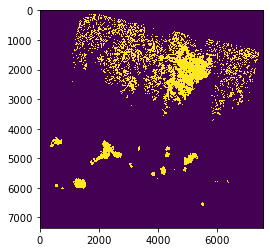

In [8]:
cloud_only_mask = pyUnpackQA.unpack_to_array(img_qa_data, 
                                             product=L8_qa_product, 
                                             flags=['Cloud'])

plt.imshow(cloud_only_mask)

Along with clouds you probably also want to mask cloud shadows.
It's possible to pull both those masks at once and combine them for a single mask.

Here the `cloud_and_shadow_mask` array has an added axis at the end, with legnth 2, representing the 2 masks.
Next those 2 axis are summed, so that any value > 0 represents a pixel with either a cloud or cloud shadow 

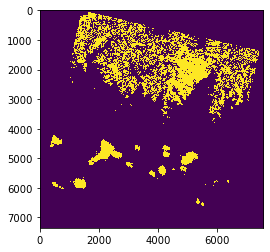

In [9]:
cloud_and_shadow_mask = pyUnpackQA.unpack_to_array(img_qa_data, 
                                                   product=L8_qa_product, 
                                                   flags=['Cloud','Cloud Shadow'])
cloud_and_shadow_mask = cloud_and_shadow_mask.sum(axis=-1) > 0

plt.imshow(cloud_and_shadow_mask)

Most QA bands are binary (either 0 or 1) but some have more values. Here the Cloud Confidence QA flag can take the following values.   
  0 - for no confidence level set
  1 - Low confidence
  2 - Medium confidence
  3 - High confidence

These can be plotted as well to show the variation in cloud confidence 
across the scene.

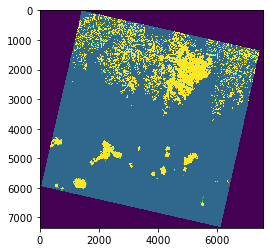

In [10]:
cloud_confidence = pyUnpackQA.unpack_to_array(img_qa_data, 
                                              product=L8_qa_product, 
                                              flags=['Cloud Confidence'])

plt.imshow(cloud_confidence)

If you need several masks for different purposes it would be useful.  
For example, say you want to mask out cloudy pixels, but you also want the water mask to highlight rivers or lakes.  
The unpack_to_dict function allows for easier separation to use flags later.  

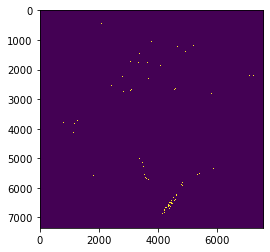

In [11]:
masks = pyUnpackQA.unpack_to_dict(img_qa_data, 
                                  product=L8_qa_product, 
                                  flags=['Cloud','Water'])

plt.imshow(masks['Cloud'])
plt.imshow(masks['Water'])